In [178]:
import numpy as np
from numpy import random as rand
from scipy import linalg as la
from scipy import special as sp
import matplotlib.pyplot as plt

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [179]:
N=1000
x1=rand.normal(0,1,N) ; x2=x1 + rand.normal(0,3,N) ; x3=2*x1 + x2
data=np.array([x1, x2, x3])

In [180]:
# General Visualization Function
def plotting(data, title='', scale_factor=0.5):
    n_of_plots=int(sp.comb(data.shape[0], 2))
    R, D, L= la.svd(data)
    l= D**2/(N-1)
    V= R
    fig, ax=plt.subplots(nrows=1,ncols=n_of_plots,figsize=(20,5))
    fig.suptitle(title)
    k=0
    for i in range(0,data.shape[0]):
        for j in range(i+1,data.shape[0]):
            ax[k].scatter(data[i],data[j], marker='o', alpha=0.3)
            ax[k].set_xlabel(str('$x_'+str(i+1)+'$'))
            ax[k].set_ylabel(str('$x_'+str(j+1)+'$'))
            for li, vi in zip(l, V.T):
                ax[k].plot([0, scale_factor*li*vi[i]], [0, scale_factor*li*vi[j]], 'r-', lw=2)
            k+=1
    plt.show()

The eigenvalues are: 
 [ 3.05083986e+01+0.j -1.11700907e-15+0.j  1.99443220e+00+0.j] 

The corresponding eigenvectors are: 
 [[-0.11414351 -0.81649658  0.56595459]
 [-0.57900647 -0.40824829 -0.70575126]
 [-0.80729348  0.40824829  0.42615791]] 


SVD decomposition
The eigenvalues are: 
 [3.05235014e+01 1.99456258e+00 1.74429885e-31] 

The corresponding eigenvectors are: 
 [[-0.11417135  0.56594897 -0.81649658]
 [-0.57897174 -0.70577975 -0.40824829]
 [-0.80731445  0.42611819  0.40824829]] 


Percentage of variability removing the smallest eigenvalue 100.0 %


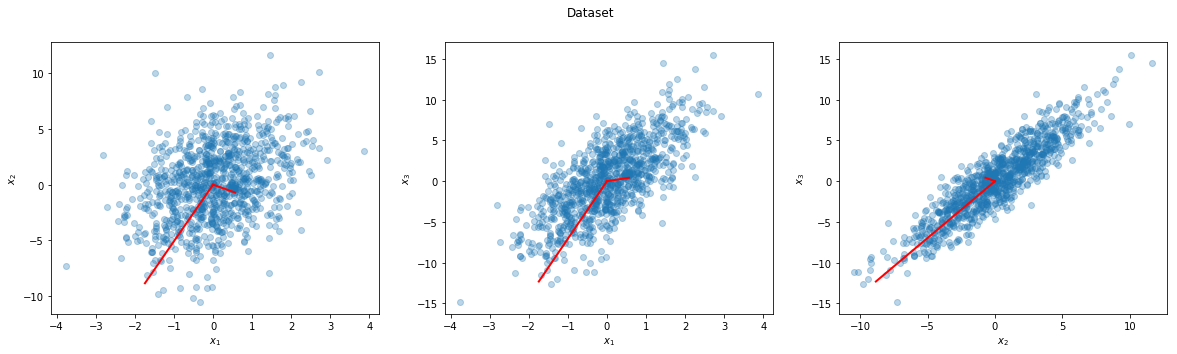

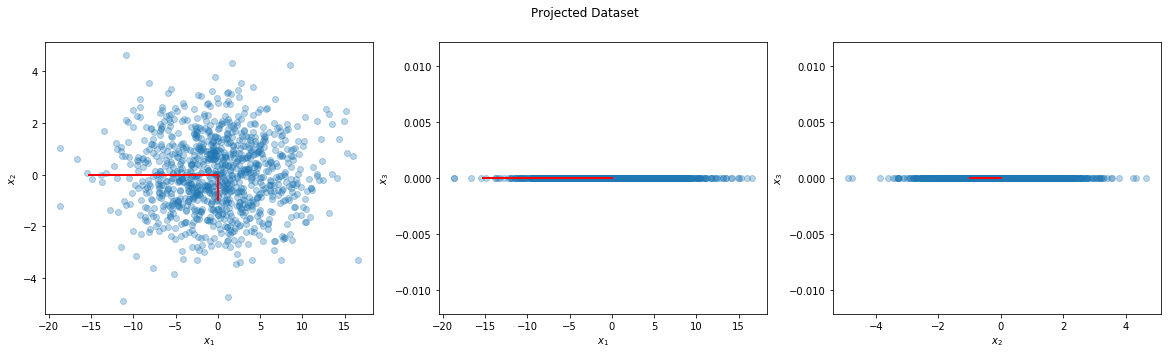

In [181]:
###
cov=np.cov(data)
l, V= la.eig(cov)
print('The eigenvalues are: \n', l, '\n')
print('The corresponding eigenvectors are: \n', V, '\n\n')

###
R, D, L= la.svd(data)
l_svd= D**2/(N-1)
V_svd= R
print('SVD decomposition')
print('The eigenvalues are: \n', l_svd, '\n')
print('The corresponding eigenvectors are: \n', V_svd, '\n\n')

#The two methods yield the same result except for one eigenvalue which is 
#probably due to machine precision limits in the representation


###
#One of the eigenvalues is very small compared to the other ones 

var_ratio=(l_svd[0]+l_svd[1])/np.sum(l_svd)
print('Percentage of variability removing the smallest eigenvalue', var_ratio*100,'%')

#we can see that the percentage of variability due to the 2 bigger principal components is 'close' to 100%


###
data_p=np.dot(V_svd.T, data)


### Visualization
plotting(data, 'Dataset')
plotting(data_p, 'Projected Dataset')


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [182]:
### Dataset
n_data=data
for i in range(10):
    std1=np.random.uniform(0.5, 1)/10
    std2=np.random.uniform(2.5, 3)/10
    n_data[0]+=np.random.normal(0,std1,N)
    n_data[1]+=np.random.normal(0,std2,N)
n_data[2]=2*n_data[0]+n_data[1]

The eigenvalues are: 
 [ 3.15040471e+01+0.j -1.07822256e-15+0.j  2.15950416e+00+0.j] 

The corresponding eigenvectors are: 
 [[-0.10992833 -0.81649658  0.5667884 ]
 [-0.58424286 -0.40824829 -0.70142257]
 [-0.80409952  0.40824829  0.43215424]] 


SVD decomposition
The eigenvalues are: 
 [3.15385734e+01 2.15951590e+00 2.76765480e-31] 

The corresponding eigenvectors are: 
 [[-0.10994062  0.56678602 -0.81649658]
 [-0.58422765 -0.70143523 -0.40824829]
 [-0.80410889  0.43213681  0.40824829]] 


Percentage of variability removing the smallest eigenvalue 100.0 %


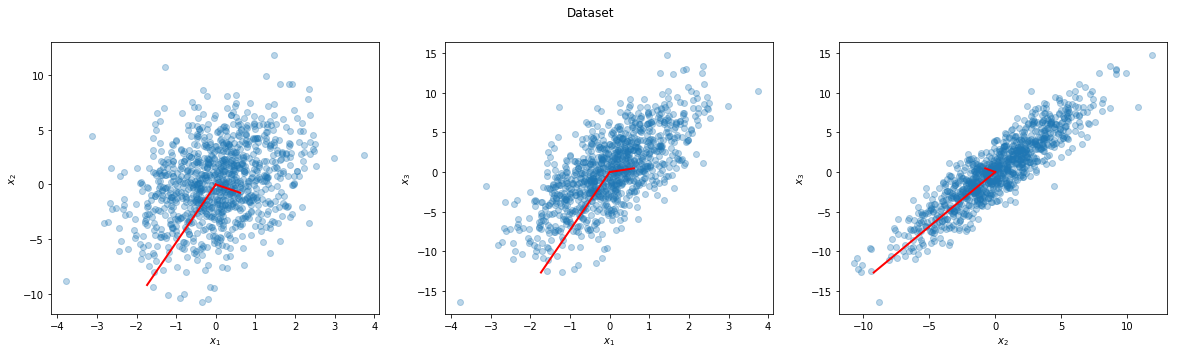

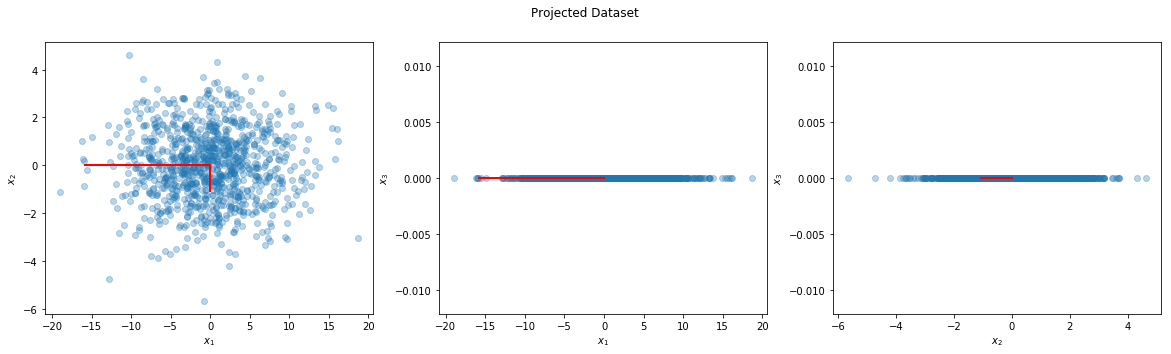

In [183]:
###
cov=np.cov(n_data)
l, V= la.eig(cov)
print('The eigenvalues are: \n', l, '\n')
print('The corresponding eigenvectors are: \n', V, '\n\n')

###
R, D, L= la.svd(n_data)
l_svd= D**2/(N-1)
V_svd= R
print('SVD decomposition')
print('The eigenvalues are: \n', l_svd, '\n')
print('The corresponding eigenvectors are: \n', V_svd, '\n\n')


###
var_ratio=(l_svd[0]+l_svd[1])/np.sum(l_svd)
print('Percentage of variability removing the smallest eigenvalue', var_ratio*100,'%')


###
n_data_p=np.dot(V_svd.T, n_data)


### Visualization
plotting(n_data, 'Dataset')
plotting(n_data_p, 'Projected Dataset')

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


***
$$SOLUTION$$

One can generate the camera record starting from the cartesian coordinates equation of the harmonic oscillator and applying a coordinates transformation to underline the dependancy from the angular coordinates.

$$x=Acos(\omega t + \xi) \;\;\; \Rightarrow \;\;\; r=\frac{Acos(\omega t + \xi)}{sen\theta cos\phi}$$

And since we have that $x=r$:

$$x=\frac{Acos(\omega t + \xi)}{sen\theta cos\phi}$$

--> for simplicity we set $A=\xi=0$ and $\omega=1$

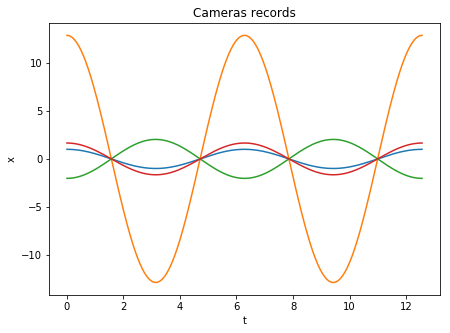

In [184]:
### Generate the initial data with coordinates θ=π/2 and ϕ=0
n_cameras=4
N=1000
t=np.linspace(0, 4*np.pi, N)
x=np.array(np.cos(t))
records=np.zeros((n_cameras,N))

### Rotate the dataset and plot
records[0]=x
plt.figure(figsize=(7,5)); plt.plot(t,records[0])
i=1
for theta, phi in zip(rand.uniform(0, np.pi, n_cameras-1), rand.uniform(0, 2*np.pi, n_cameras-1)):
    records[i]=x/(np.sin(theta)*np.cos(phi))
    plt.plot(t,records[i])
    i+=1
plt.title('Cameras records'); plt.xlabel('t'); plt.ylabel('x')
plt.show()

The eigenvalues are: 
 [8.72232754e+01 1.00092823e-31 5.66853263e-33 1.65871128e-33] 

Percentage of variability keeping the biggest eigenvalue: 100.0 %


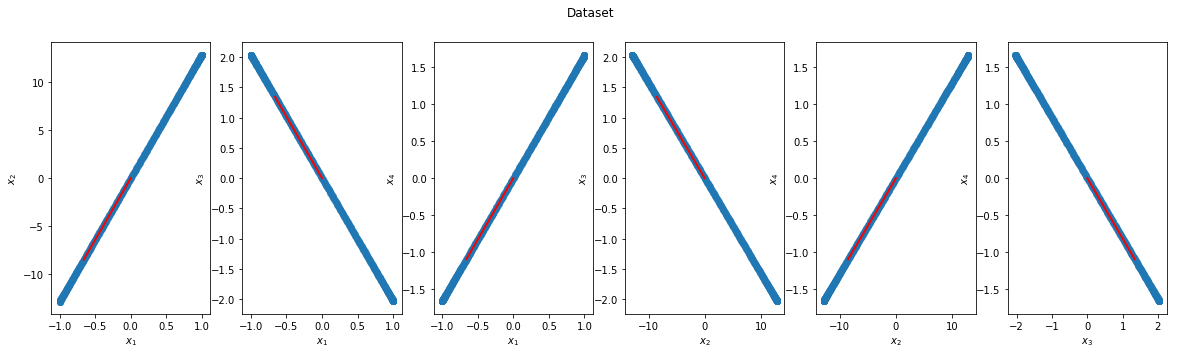

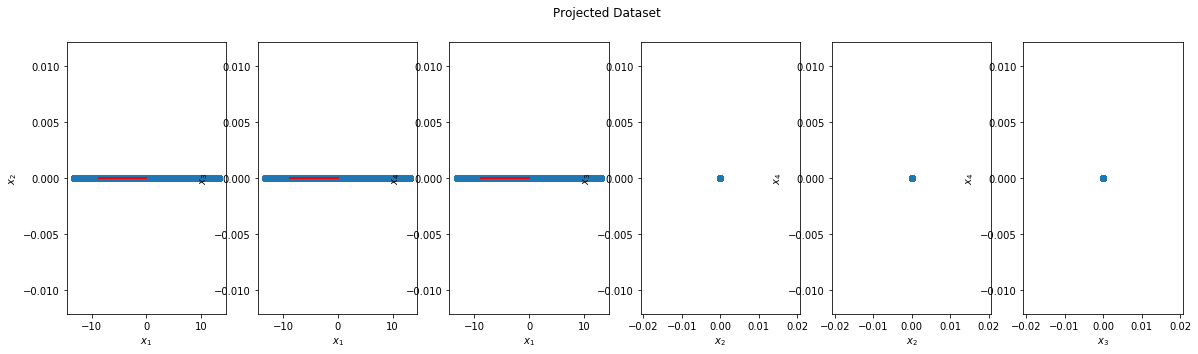

In [185]:
### PCA analysis
R, spec, L=la.svd(records)
eig=spec**2/(N-1)

print('The eigenvalues are: \n', eig, '\n')
print('Percentage of variability keeping the biggest eigenvalue:', eig[0]/np.sum(eig)*100,'%')

p_records=np.dot(R.T, records)

plotting(records, title='Dataset', scale_factor=0.1)
plotting(p_records, title='Projected Dataset', scale_factor=0.1)

# As we can clearly see, the PCA analysis and dimentional reduction tells us that the only 
# coordinate variation that matters is the one from witch the dataset was generated, since 
# the other ones were just rotations of the first one.

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset